# Import packages

In [1]:
## Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.datasets import load_wine, load_iris

%matplotlib inline

# Load Data

In [2]:
wine = load_wine()
wine_df = pd.DataFrame(data=np.c_[wine.data, wine.target], columns=wine.feature_names + ['target'])

wine_df['class'] = pd.Categorical.from_codes(wine.target, wine.target_names)

In [3]:
print(wine_df.shape)
wine_df.head()

(178, 15)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,class_0


In [4]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])

iris_df['class'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [5]:
iris_df.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'target', 'class']

In [6]:
print(iris_df.shape)
iris_df.head()

(150, 6)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,class
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


# Getting Pandas DataFrame fancier

**Highlighting the highest and the lowest values for each column.**

In [7]:
(
wine_df.head(10).style.highlight_max(color='lightcoral')
                      .highlight_min(color='lightskyblue')
)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.230000,1.710000,2.430000,15.600000,127.000000,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065.000000,0.000000,class_0
1,13.200000,1.780000,2.140000,11.200000,100.000000,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050.000000,0.000000,class_0
2,13.160000,2.360000,2.670000,18.600000,101.000000,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185.000000,0.000000,class_0
3,14.370000,1.950000,2.500000,16.800000,113.000000,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480.000000,0.000000,class_0
4,13.240000,2.590000,2.870000,21.000000,118.000000,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735.000000,0.000000,class_0
5,14.200000,1.760000,2.450000,15.200000,112.000000,3.270000,3.390000,0.340000,1.970000,6.750000,1.050000,2.850000,1450.000000,0.000000,class_0
6,14.390000,1.870000,2.450000,14.600000,96.000000,2.500000,2.520000,0.300000,1.980000,5.250000,1.020000,3.580000,1290.000000,0.000000,class_0
7,14.060000,2.150000,2.610000,17.600000,121.000000,2.600000,2.510000,0.310000,1.250000,5.050000,1.060000,3.580000,1295.000000,0.000000,class_0
8,14.830000,1.640000,2.170000,14.000000,97.000000,2.800000,2.980000,0.290000,1.980000,5.200000,1.080000,2.850000,1045.000000,0.000000,class_0
9,13.860000,1.350000,2.270000,16.000000,98.000000,2.980000,3.150000,0.220000,1.850000,7.220000,1.010000,3.550000,1045.000000,0.000000,class_0


In [8]:
(
iris_df.sample(10).style.background_gradient(subset=['sepal_length_cm', 'petal_length_cm'], cmap='PuBu').
                    background_gradient(subset=['sepal_width_cm', 'petal_width_cm'], cmap='YlOrBr')

)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,class
121,5.600000,2.800000,4.900000,2.000000,2.000000,virginica
101,5.800000,2.700000,5.100000,1.900000,2.000000,virginica
46,5.100000,3.800000,1.600000,0.200000,0.000000,setosa
86,6.700000,3.100000,4.700000,1.500000,1.000000,versicolor
30,4.800000,3.100000,1.600000,0.200000,0.000000,setosa
68,6.200000,2.200000,4.500000,1.500000,1.000000,versicolor
119,6.000000,2.200000,5.000000,1.500000,2.000000,virginica
122,7.700000,2.800000,6.700000,2.000000,2.000000,virginica
5,5.400000,3.900000,1.700000,0.400000,0.000000,setosa
143,6.800000,3.200000,5.900000,2.300000,2.000000,virginica


# Scatter plots
The x-y plot or scatter plot represents the pairs of data from two datasets. <br>
We use them to spot any **correlation** between the two variables.

### Matplotlib
Use **scatter** or use **plt.subplots** to stylize our plot with title and labels.

Text(0, 0.5, 'Sepal Width (cm)')

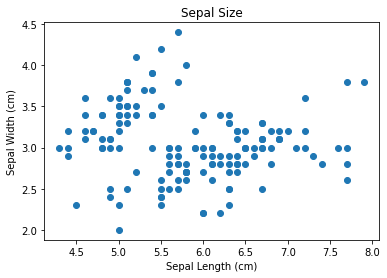

In [9]:
# Create a figure and axis
fig, ax = plt.subplots()

# Scatter the sepal length against the sepal width
ax.scatter(iris_df['sepal_length_cm'], iris_df['sepal_width_cm'])

# Set title and labels
ax.set_title('Sepal Size')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

The plot would have more meaning if the data points are colored by class.  In Matplotlib we can create a color dictionary and then assign a color for each class.

In [10]:
iris_df.loc[iris_df['class'] == 'setosa']['sepal_length_cm'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length_cm, dtype: float64

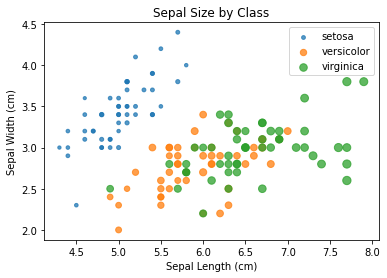

In [11]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot each data point
for class_ in np.unique(iris_df['class']):
    filt = iris_df['class'] == class_
    ax.scatter(iris_df[filt]['sepal_length_cm'],
               iris_df[filt]['sepal_width_cm'],
               s = 10 * iris_df[filt]['petal_length_cm'], 
               alpha = 0.75,
               label= class_)

# Set title and labels
ax.set_title('Sepal Size by Class')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.legend()

### Pandas
To create a scatter plot in Pandas we can call **dataset.plot.scatter()**. The axes labels will automatically be created from the DataFrame column names.

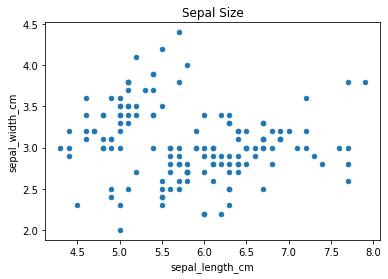

In [12]:
iris_df.plot.scatter(x = 'sepal_length_cm',
                     y = 'sepal_width_cm',
                     title = 'Sepal Size',)

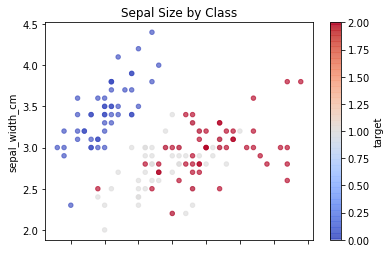

In [13]:
iris_df.plot.scatter(x = 'sepal_length_cm',
                     y = 'sepal_width_cm',
                     c = 'target',
                     colormap = 'coolwarm',
                     title = 'Sepal Size by Class',
                     alpha = 0.65)

### Seaborn
Seaborn has a **.scatterplot** method to create a scatterplot similar to Pandas.

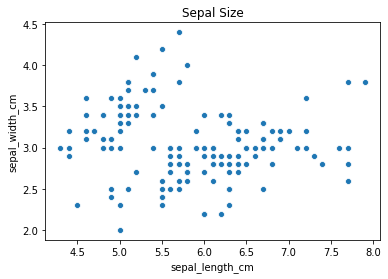

In [14]:
# Create a seaborn scatter plot
sns.scatterplot(x = 'sepal_length_cm',
                y = 'sepal_width_cm',
                data = iris_df)
plt.title('Sepal Size');

In [15]:
iris_df.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'target', 'class'],
      dtype='object')

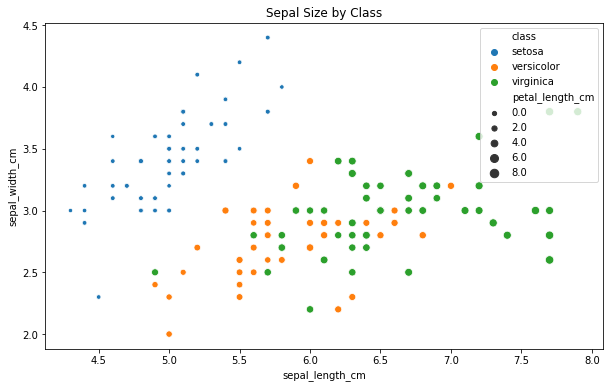

In [16]:
plt.figure(figsize=(10,6))
plt.title('Sepal Size by Class')
sns.scatterplot(x = 'sepal_length_cm',
                y = 'sepal_width_cm',
                data = iris_df,
                hue = 'class',
                size = 'petal_length_cm')


### Plotnine
Use **geom_point()** for a basic scatter plot with plotnine.

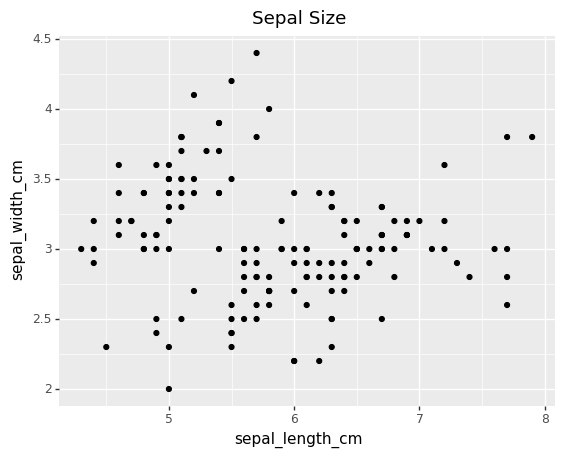

<ggplot: (-9223371893629097088)>

In [17]:
# Simple scatter plot with plotnine
(
ggplot(iris_df, aes('sepal_length_cm', 'sepal_width_cm')) 
    + geom_point() 
    + labs(title='Sepal Size')
)

In [18]:
iris_df.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'target', 'class'],
      dtype='object')

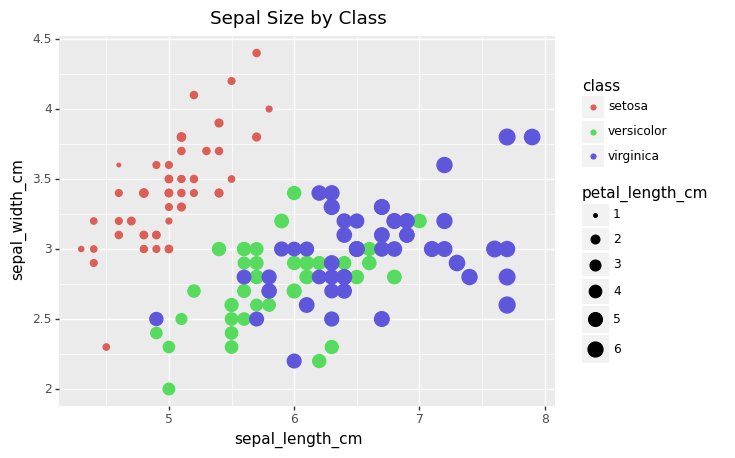

<ggplot: (-9223371893629168880)>

In [19]:
# Advanced scatter plot with plotnine
(
ggplot(iris_df, aes(x='sepal_length_cm', y='sepal_width_cm', color='class', size='petal_length_cm'))
    + geom_point()
    + labs(title='Sepal Size by Class')
)

# Line Charts
One of the most fundamental plots - a line chart to display a series of data points

### Matplotlib
Call line-chart with the method **.plot()** - Matplotlib *might require a loop* to plot multiple columns in one graph.

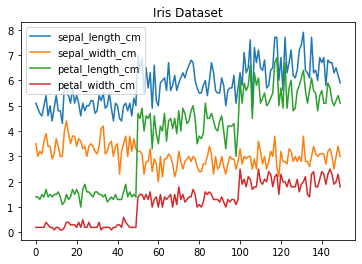

In [20]:
# Get columns to plot.
columns = iris_df.columns.drop(['target', 'class'])
# Create x data
x_data = range(0, iris_df.shape[0])
# Create figure and axis
fig, ax = plt.subplots()
# Plot each column
for column in columns:
    ax.plot(x_data, iris_df[column], label=column)
# Set title and legend
ax.set_title('Iris Dataset')
ax.legend()

### Pandas
It creates a line-chart calling **.plot.line()** method *without any loops.*

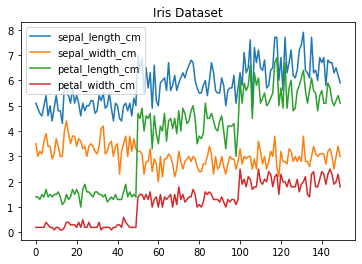

In [21]:
# Pandas line chart
iris_df.drop(['target', 'class'], axis=1).plot.line(title='Iris Dataset')

### Seaborn
Line-chart with seaborn calls method **sns.lineplot()**

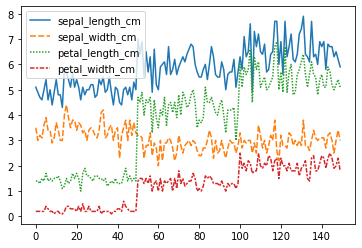

In [22]:
# Seaborn line chart
sns.lineplot(data=iris_df.drop(['target', 'class'], axis=1))

### Plotnine
For plotting multiple line charts with **geom_line()**, you will need to do a little data manipulation to get into a format for ggplot mappings.

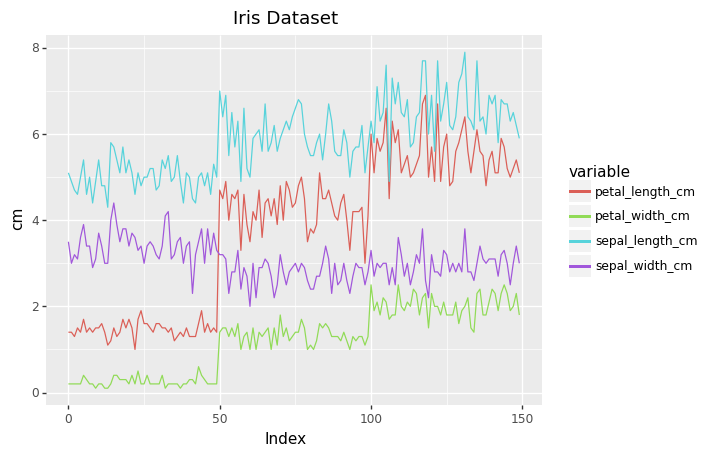

<ggplot: (-9223371893622784812)>

In [23]:
cleaned_data = iris_df.drop(['target', 'class'], axis=1)
cleaned_data['Index'] = cleaned_data.index.tolist()
cleaned_data =  cleaned_data.melt(id_vars=['Index'], value_vars=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm'], value_name = 'cm')
(
ggplot(cleaned_data)
    + aes(x='Index', y='cm', color='variable')
    + geom_line()
    + labs(title='Iris Dataset')
)

# Histograms
Histograms are useful for a large number of unique values in a dataset.  The values are sorted into intervals, called bins.  From histograms we can understand the **distribution** (aka frequency) of the data. <br>

### Matplotlib
Using method **.hist()** - *with may additional parameters*

Text(0, 0.5, 'Frequency')

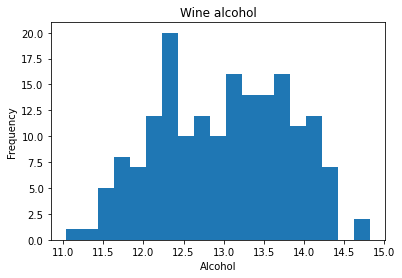

In [24]:
# Create a figure and axis
fig, ax = plt.subplots()
# Plot histogram
ax.hist(wine_df['alcohol'], bins=np.linspace(np.min(wine_df['alcohol']), np.max(wine_df['alcohol']), 20))
# Set tilte and labels
ax.set_title('Wine alcohol')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Frequency')

### Pandas
Using method **.plot.hist()**

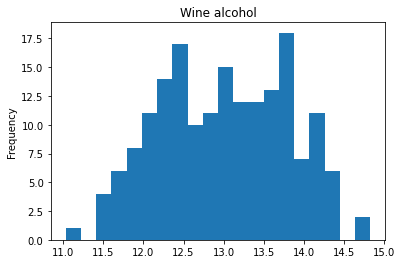

In [25]:
# Histogram using pandas
wine_df['alcohol'].plot.hist(title='Wine alcohol', bins=20)

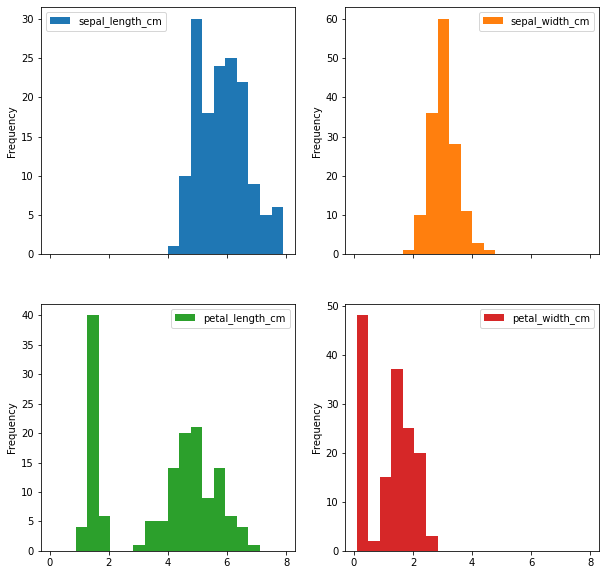

In [26]:
# Creting multiple plots
iris_df.drop(['target', 'class'], axis=1).plot.hist(subplots=True, layout=(2,2), figsize=(10,10), bins=20);

### Seaborn
Using method **sns.distplot()** - *with many additional parameters*

Text(0.5, 1.0, 'Wine alcohol')

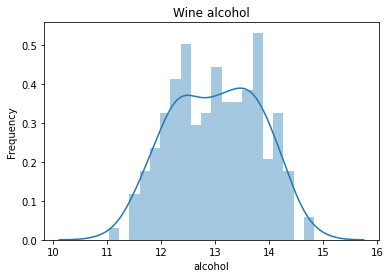

In [27]:
# Seaborn histogram
sns.distplot(wine_df['alcohol'], bins=20, kde=True)
plt.ylabel('Frequency')
plt.title('Wine alcohol')

### Plotnine
Using method **geom_histogram()**

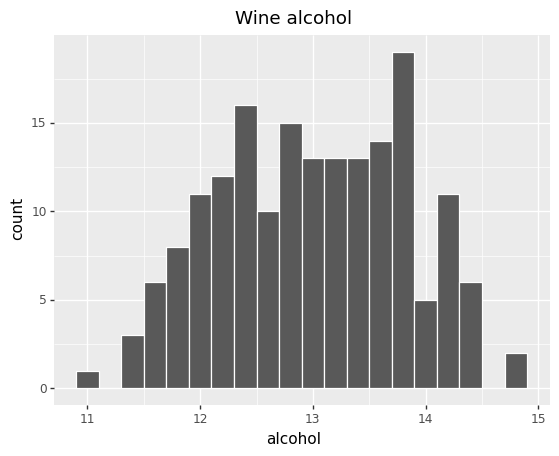

<ggplot: (-9223371893622297008)>

In [28]:
(
ggplot(wine_df, aes(x='alcohol'))
    + geom_histogram(color='white', bins=20)
    + labs(title='Wine alcohol')
)

Using method **geom_density()**

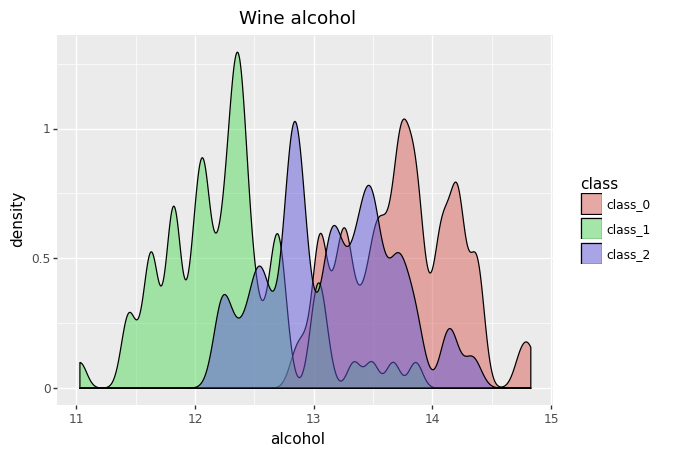

<ggplot: (-9223371893622512764)>

In [29]:
(
ggplot(wine_df)
    + aes(x='alcohol', fill='class')
    + geom_density(adjust=1/3, alpha=0.5)
    + labs(title='Wine alcohol')
)

# Bar charts
Bar charts illustrate data corresponding to given labels or **discrete** numeric values (like pies charts).  These charts are good when there is low cardinality (not a lot of categories)

### Matplotlib
Use the **.bar()** method, with the caveat that you need to manually calculate the frequencies of the categories you are interested in, which can be done using **value_counts**.

Text(0, 0.5, 'Count')

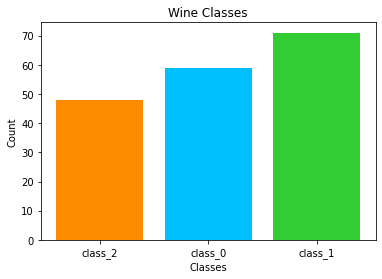

In [30]:
# Create a figure and axis
fig, ax = plt.subplots()
# Count the occurrence of each class
data = wine_df['class'].value_counts(ascending=True)    # type == pd.Series
# Get x and y data
alcohol = data.index
frequency = data.values
# Create bar chart
ax.bar(x=alcohol, height=frequency, color=['darkorange', 'deepskyblue', 'limegreen'])
# Set title and labels
ax.set_title('Wine Classes')
ax.set_xlabel('Classes')
ax.set_ylabel('Count')

### Pandas
Use **.plot.bar()** method, but like with *matplotlib* this method requires that we need to count the occurences using **value_counts** and sort using **sort_index**. <br>
**.plot.barh()** for an horizontal bar plot.

Text(0, 0.5, 'Count')

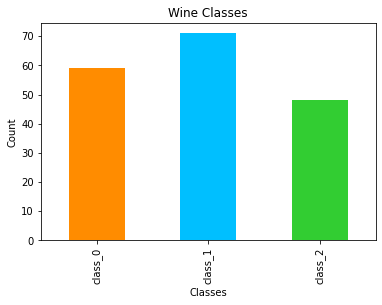

In [31]:
# Create the plot
wine_df['class'].value_counts().sort_index().plot.bar(color=['darkorange', 'deepskyblue', 'limegreen'])
# Set title and labels
plt.title('Wine Classes')
plt.xlabel('Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Average Alcohol')

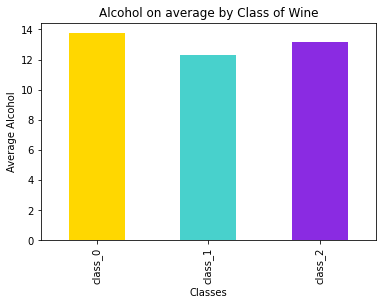

In [32]:
# Create the plot
(
wine_df.groupby('class')['alcohol']
       .mean()
       .plot.bar(color = ['gold', 'mediumturquoise', 'blueviolet'])
)
# Set title and labels
plt.title('Alcohol on average by Class of Wine')
plt.xlabel('Classes')
plt.ylabel('Average Alcohol')

### Seaborn
Use **.countplot()** to create a bar-chart, no need to do any data manipulation.

Text(0.5, 1.0, 'Wine Classes')

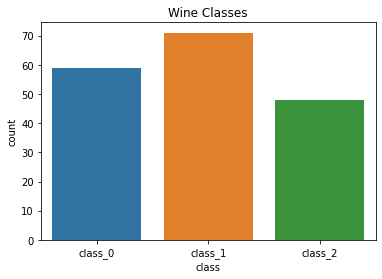

In [33]:
sns.countplot(wine_df['class'])
plt.title('Wine Classes')

### Plotnine
Use **geom_bar()** with plotnine 

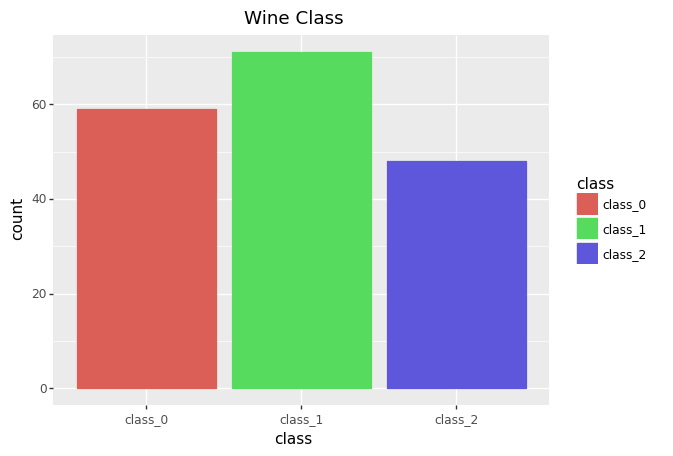

<ggplot: (-9223371893622565496)>

In [34]:
(
ggplot(wine_df)
    + aes(x='class', color='class', fill='class')
    + geom_bar()
    + labs(title='Wine Class')
)

# Box plots
Box plots (and violin plots) are excellent for visualizing *descriptive statistics* of a dataset since they show the range, interquartile range, median, mode, outliers and all quartiles.

### Matplotlib
Use the method **.boxplot()**.  In order to display multiple columns in one figure we need to construct an array of data.

[Text(0, 0, 'sepal_length_cm'),
 Text(0, 0, 'sepal_width_cm'),
 Text(0, 0, 'petal_length_cm'),
 Text(0, 0, 'petal_width_cm')]

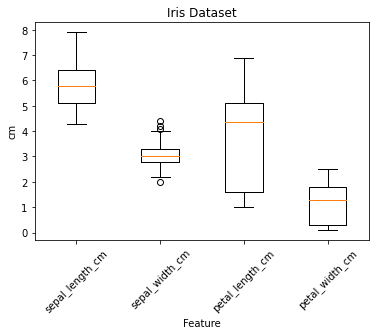

In [35]:
# Get columns to plot
columns = iris_df.columns.drop(['target', 'class'])
data = []
for column in columns:
    data.append(iris_df[column])
# Create a figure and axis
fig, ax = plt.subplots()
# Plot each column
ax.boxplot(data)
# Set title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('Feature')
ax.set_ylabel('cm')
ax.set_xticklabels(columns, rotation=45)

### Pandas
Use **.boxplot()** to create boxplot from Pandas dataframe.

Text(0, 0.5, 'cm')

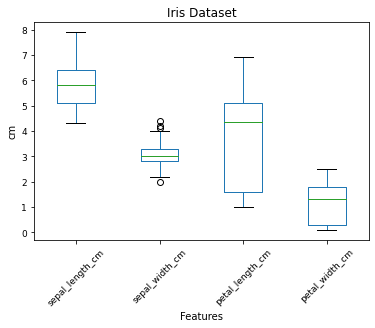

In [36]:
iris_df.drop(['target', 'class'], axis=1).boxplot(grid=False, rot=45, fontsize=9)
plt.title('Iris Dataset')
plt.xlabel('Features')
plt.ylabel('cm')

### Seaborn
Just need **sns.boxplot()** method to create amazing boxplots.

Text(0, 0.5, 'cm')

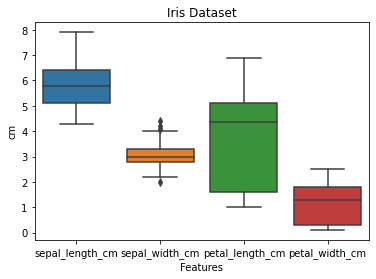

In [37]:
sns.boxplot(data=iris_df.drop(['target', 'class'], axis=1))
plt.title('Iris Dataset')
plt.xlabel('Features')
plt.ylabel('cm')

Text(0, 0.5, 'Sepal Length (cm)')

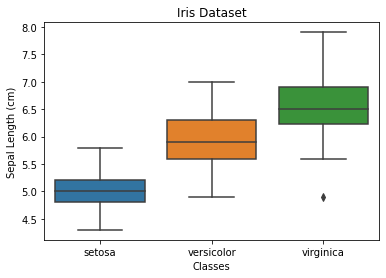

In [38]:
# Boxplots are also useful for viewing the different statistics of a feature broken down by class
sns.boxplot(x='class', y='sepal_length_cm', data=iris_df)
plt.title('Iris Dataset')
plt.xlabel('Classes')
plt.ylabel('Sepal Length (cm)')

Text(0.5, 1.0, 'Iris Dataset')

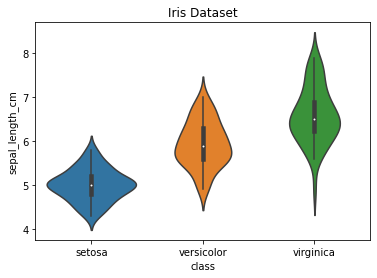

In [39]:
# Alternative to box plot is a violin plot showing 
# the kernel density estimation underlying the distribution
sns.violinplot(x='class', y='sepal_length_cm', data=iris_df)
plt.title('Iris Dataset')

# Pie Charts
Represent data with a small number of labels and given relative frequencies.

In [40]:
data_counts = (wine_df['class'].value_counts(normalize=True)
               .rename_axis('class')
               .reset_index(name='percent'))

data_counts['percent'] = round(100*data_counts['percent'])
data_counts

,class,percent
0,class_1,40.0
1,class_0,33.0
2,class_2,27.0


### Matplotlib
Use **.plt.pie()** method to create pie charts

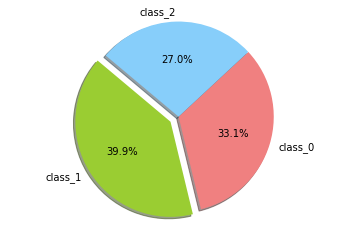

In [41]:
data = wine_df['class'].value_counts()
labels = list(data.index)
sizes = data.values
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        startangle=140,
        shadow=True);
plt.axis('equal');

### Pandas
Use the method **.plot.pie()** on a dataframe.

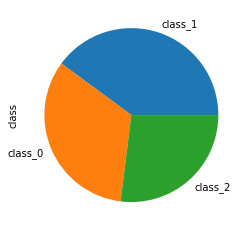

In [42]:
wine_df['class'].value_counts().plot.pie()

### Seaborn
This library does not provide *pie charts* :´(

### Plotnine
This library does not provide *pie charts* :´(

# Heatmaps
Heatmaps can visually represent a matrix. The colors represent the numbers or elements of the matrix.  They are used for showing covariance and correlation matrices. <br> Pandas **.corr()** allows you to easily create a correlation matrix or you can use numpy **np.corrcoef()** method.

### Matplotlib
Use Pandas correlation **.corr()** to easily get the correlation of features inside a dataframe and results in a correlation matrix. <br>
Method **.imshow()** creates the *heatmap.*

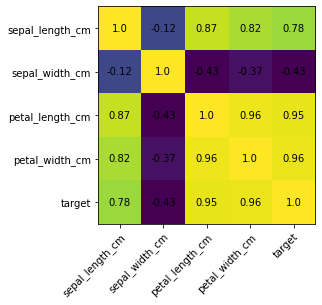

In [43]:
fig, ax = plt.subplots()
# Get correlation matix
corr = iris_df.corr()
# Create the heatmap
im = ax.imshow(corr.values)
# Set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

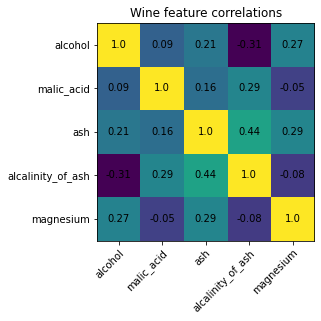

In [44]:
# Get the corr of the desire data
interesting_columns = ['alcohol',
                       'malic_acid',
                       'ash',
                       'alcalinity_of_ash',
                       'magnesium']

wine_data = wine_df[interesting_columns]
corr = wine_data.corr()
# Set fig and axis
fig, ax = plt.subplots()
# Create the plot
ax.imshow(corr.values)
# Set title
ax.set_title('Wine feature correlations')
# Set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
# Rotate x_labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
# Create text annotations looping over the data

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(i, j, round(corr.iloc[i, j], 2), ha='center', va='center', color='k')

### Pandas
*Although* Pandas lets you quickly calculate the correlation matrix, you will need Matplotlib or Seaborn to plot the heatmap.

### Seaborn
The best and easiest way to create a heatmap!! <br>
**sns.heatmap()**

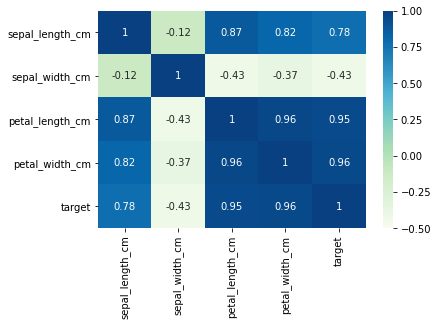

In [45]:
sns.heatmap(iris_df.corr(), annot=True, cmap='GnBu', vmin=-0.5, vmax=1)

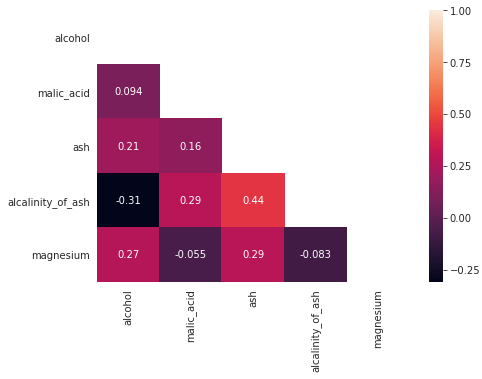

In [46]:
# Add a mask so you don't show redundant information
mask = np.zeros_like(wine_data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (7, 5))
    sns.heatmap(wine_data.corr(), mask=mask, annot=True)

# Faceting
Faceting allows you to break the data variables up across multiple subplots and combine into a single feature.  This will allow you to quickly explore and visualize your datasets.  Faceting is available in Seaborn and Plotnine.

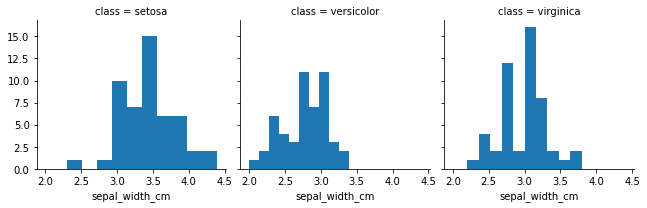

In [47]:
(
sns.FacetGrid(data=iris_df.drop(['target'], axis=1), col='class')
    .map(plt.hist, 'sepal_width_cm')
)

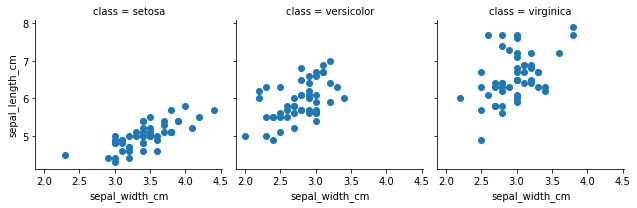

In [48]:
(
sns.FacetGrid(data=iris_df.drop(['target'], axis=1), col='class')
    .map(plt.scatter, 'sepal_width_cm', 'sepal_length_cm')
)

# Pairwise Data Compairson
Pandas and Seaborn both have methods to plot pairwise relationships in your dataset - which can be extremely useful - *just be careful for large datasets.*

### Pandas
Pandas has a **pd.plotting.scatter_matrix()** which makes it easy peasy

C:\Users\Javi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


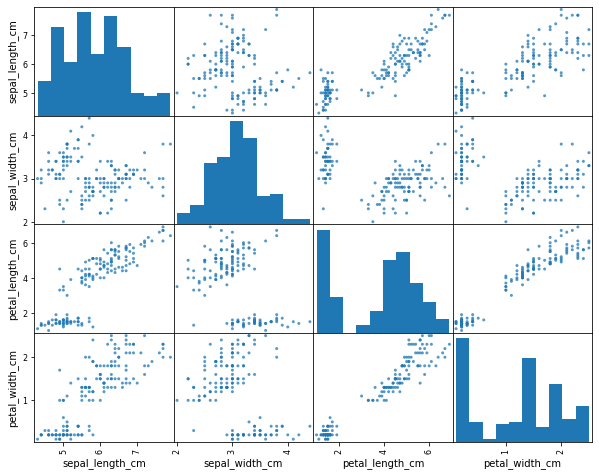

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
pd.plotting.scatter_matrix(iris_df.drop(['target', 'class'], axis=1), ax=ax, alpha=0.75);

### Seaborn 
Seaborn also has a very useful **sns.pairplot()** method that automatically plots a grid of pairwise relationships in the dataset.

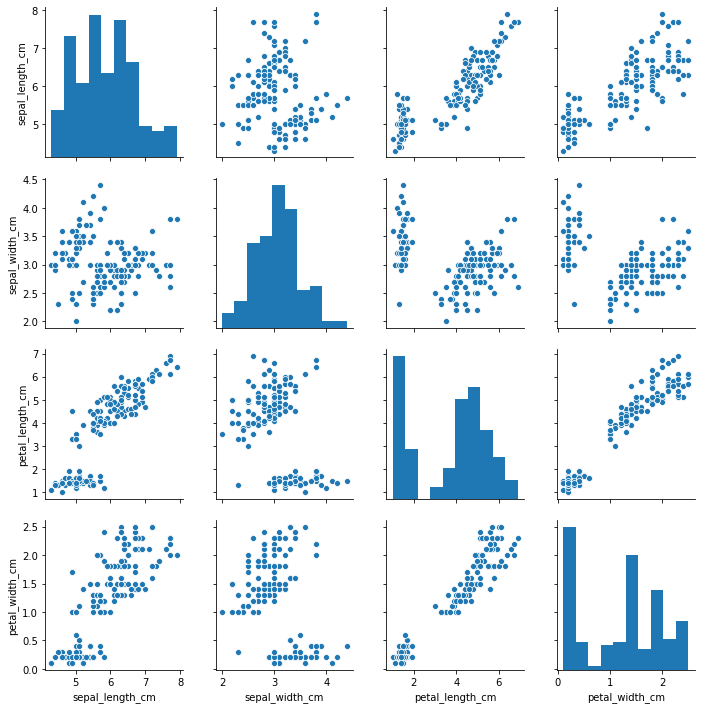

In [50]:
sns.pairplot(iris_df.drop(['target', 'class'], axis=1))